# Análisis del Acero 

### Descargar el Histórico
#### https://www.wsj.com/market-data/quotes/index/XX/STEEL/historical-prices

#### https://builtin.com/data-science/time-series-forecasting-python


In [235]:
import pandas as pd
import datetime

In [236]:
steel = pd.read_csv('./steel_2010_221101.csv')
steel

,Date,Open,High,Low,Close
0,10/31/22,1515.46,1540.19,1502.85,1527.60
1,10/28/22,1549.91,1549.91,1495.24,1515.46
2,10/27/22,1569.01,1569.01,1540.51,1549.92
3,10/26/22,1549.37,1598.02,1546.81,1569.01
4,10/25/22,1545.64,1556.36,1516.04,1549.37
...,...,...,...,...,...
3223,01/08/10,1819.66,1872.38,1819.66,1866.62
3224,01/07/10,1827.25,1827.25,1794.30,1819.66
3225,01/06/10,1785.33,1834.36,1783.68,1827.25
3226,01/05/10,1770.72,1796.94,1767.13,1785.33


In [237]:
steel = steel.drop(columns=['Open', 'Low', 'Close'])
steel = steel.rename(columns={"High": "STEEL"})

In [238]:
steel['Date'] = steel['Date'].str[0:2]+'/'+steel['Date'].str[3:5]+'/20'+steel['Date'].str[6:9]

In [239]:
steel.describe()

,STEEL
count,3228.000000
mean,1272.399777
std,360.317227
min,456.510000
25%,1036.320000
50%,1241.275000
75%,1510.945000
max,2415.200000


In [240]:
steel['Date'] = pd.to_datetime(steel['Date'], format="%m/%d/%Y")
#steel

In [241]:
steel.index = pd.to_datetime(steel['Date'], format='%Y-%m-%d')
steel.index

DatetimeIndex(['2022-10-31', '2022-10-28', '2022-10-27', '2022-10-26',
               '2022-10-25', '2022-10-24', '2022-10-21', '2022-10-20',
               '2022-10-19', '2022-10-18',
               ...
               '2010-01-15', '2010-01-14', '2010-01-13', '2010-01-12',
               '2010-01-11', '2010-01-08', '2010-01-07', '2010-01-06',
               '2010-01-05', '2010-01-04'],
              dtype='datetime64[ns]', name='Date', length=3228, freq=None)

In [242]:
del steel['Date']

In [243]:
import matplotlib.pyplot as plt
import seaborn as sns

In [244]:
sns.set()

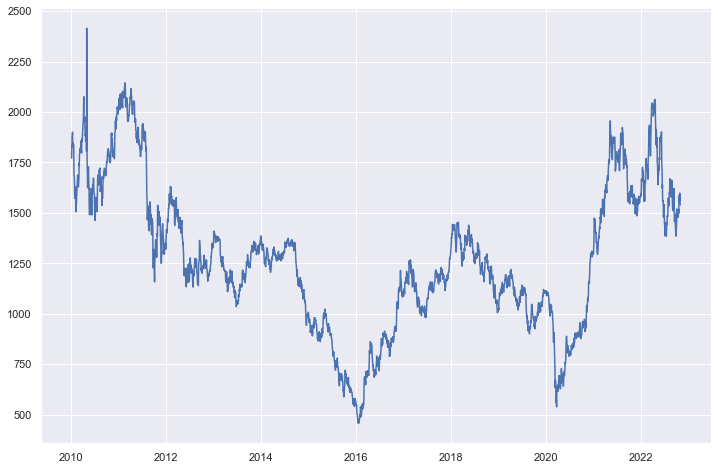

In [245]:
plt.plot(steel.index, steel['STEEL'], )

In [246]:
### Continuamos

In [247]:
data = steel
data = data.rename(columns={"STEEL": "y"})

In [248]:
data = data.sort_values('Date')

In [249]:
data = data.tail(195)
print(data.shape)
data = data.rename(columns={"STEEL": "y"})
data

(195, 1)


,y
Date,
2022-01-24,1557.89
2022-01-25,1562.76
2022-01-26,1585.17
2022-01-27,1590.53
2022-01-28,1559.71
...,...
2022-10-25,1556.36
2022-10-26,1598.02
2022-10-27,1569.01


Train dates : 2022-01-24 00:00:00 --- 2022-09-09 00:00:00  (n=159)
Test dates  : 2022-09-12 00:00:00 --- 2022-10-31 00:00:00  (n=36)


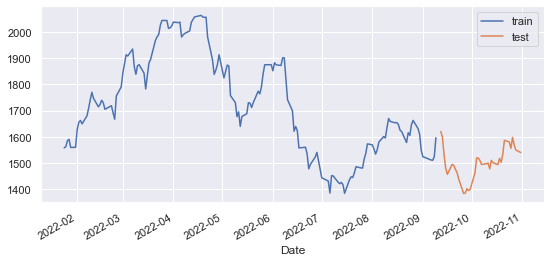

In [250]:
# Split data into train-test
# ==============================================================================
steps = 36
data_train = data[:-steps]
data_test  = data[-steps:]

print(f"Train dates : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Test dates  : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

fig, ax=plt.subplots(figsize=(9, 4))
data_train['y'].plot(ax=ax, label='train')
data_test['y'].plot(ax=ax, label='test')
ax.legend();

In [251]:
# Manipulación y tratamiento de Datos
import numpy as np
import pandas as pd

In [252]:
# Visualización de datos
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [253]:
# Modelación Arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.stattools import adfuller

In [254]:
# Métrica de Evaluación
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from sklearn import metrics

# No presentar advertencias
import warnings
warnings.filterwarnings("ignore")

In [255]:
#! pip install pmdarima
#! pip install statsforecast
#! pip install --upgrade pmdarima

In [256]:
def evaluacion_metrica(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [257]:
fig = px.line(data, x=data.index, y="y",template = "plotly_dark",
              title="Precio del Acero ")
fig.show()

In [258]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Resultados de la prueba de Dickey-Fuller para columna: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Número de observaciones utilizadas'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Rechazar la hipótesis nula")
        print("Los datos son estacionarios")
    else:
        print("Conclusion:====>")
        print("No se puede rechazar la hipótesis nula")
        print("Los datos no son estacionarios")

In [259]:
Augmented_Dickey_Fuller_Test_func(data['y'],"Precio Acero")


Resultados de la prueba de Dickey-Fuller para columna: Precio Acero
Test Statistic                         -1.546272
p-value                                 0.510510
No Lags Used                            1.000000
Número de observaciones utilizadas    193.000000
Critical Value (1%)                    -3.464694
Critical Value (5%)                    -2.876635
Critical Value (10%)                   -2.574816
dtype: float64
Conclusion:====>
No se puede rechazar la hipótesis nula
Los datos no son estacionarios


In [260]:
df1=data.copy()
# Take first difference
df1['y_diff'] = data['y'].diff()

# Remove the first data point
df1.dropna(inplace=True)

# Take a look at the head of the dataset
df1.head()

,y,y_diff
Date,,
2022-01-25,1562.76,4.87
2022-01-26,1585.17,22.41
2022-01-27,1590.53,5.36
2022-01-28,1559.71,-30.82
2022-01-31,1560.17,0.46


In [261]:
Augmented_Dickey_Fuller_Test_func(df1["y_diff"],"y_diff")


Resultados de la prueba de Dickey-Fuller para columna: y_diff
Test Statistic                       -1.084602e+01
p-value                               1.571761e-19
No Lags Used                          0.000000e+00
Número de observaciones utilizadas    1.930000e+02
Critical Value (1%)                  -3.464694e+00
Critical Value (5%)                  -2.876635e+00
Critical Value (10%)                 -2.574816e+00
dtype: float64
Conclusion:====>
Rechazar la hipótesis nula
Los datos son estacionarios


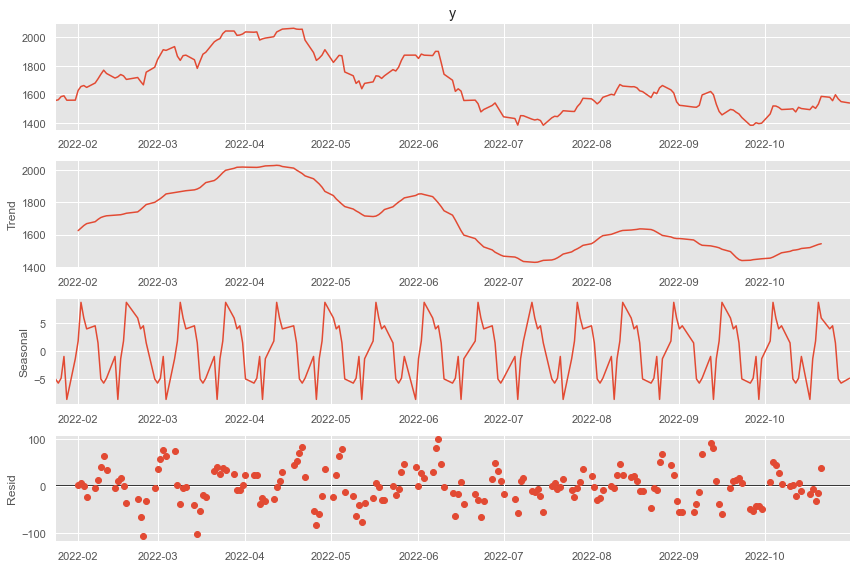

In [262]:
# 7 para los días
# 12 para los meses
# 52 para las semanas
# 4 Trimestral
# 1 Anual

from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

plt.rcParams["figure.figsize"] = (12, 8)
a = seasonal_decompose(data['y'], model = "additive", period=12)
a.plot();

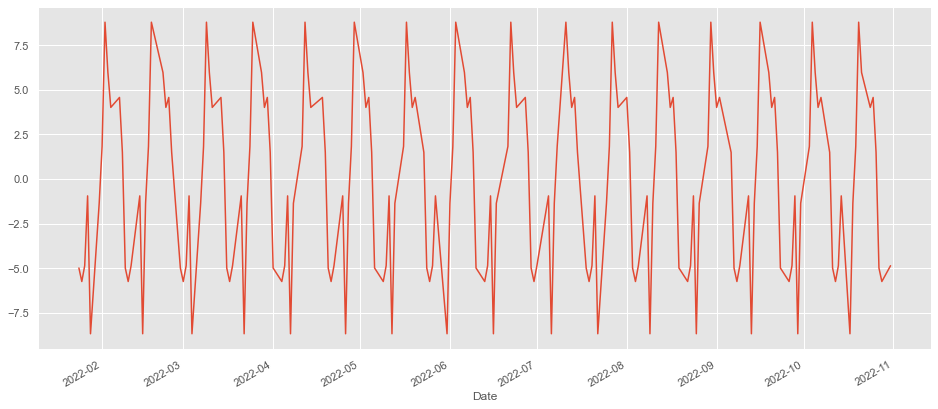

In [263]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,7))
a.seasonal.plot();

In [264]:
train_data = data_train
test_data = data_test
test = test_data.copy()

In [265]:
train_data

,y
Date,
2022-01-24,1557.89
2022-01-25,1562.76
2022-01-26,1585.17
2022-01-27,1590.53
2022-01-28,1559.71
...,...
2022-09-02,1522.16
2022-09-06,1511.87
2022-09-07,1510.62


In [266]:
test_data

,y
Date,
2022-09-12,1620.67
2022-09-13,1598.49
2022-09-14,1531.75
2022-09-15,1481.05
2022-09-16,1457.23
2022-09-19,1495.49
2022-09-20,1490.95
2022-09-21,1475.71
2022-09-22,1463.64


### LSTM Forecast

In [320]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [321]:
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)

scaled_test_data = scaler.transform(test)

In [322]:
from keras.preprocessing.sequence import TimeseriesGenerator
# cambie 12 por 52
n_input = 12
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)

Layer activations
* relu function
* sigmoid function
* softmax function
* softplus function
* softsign function
* tanh function
* selu function
* elu function
* exponential function

Available optimizers
* SGD
* RMSprop
* Adam
* Adadelta
* Adagrad
* Adamax
* Nadam
* Ftrl

In [367]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='nadam', loss='mse')

lstm_model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 200)               161600    
                                                                 
 dense_16 (Dense)            (None, 1)                 201       
                                                                 
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [368]:
lstm_model.fit_generator(generator,epochs=30)

Epoch 1/30
147/147 [==============================] - 6s 22ms/step - loss: 0.0408
Epoch 2/30
147/147 [==============================] - 4s 25ms/step - loss: 0.0141
Epoch 3/30
147/147 [==============================] - 3s 17ms/step - loss: 0.0122
Epoch 4/30
147/147 [==============================] - 2s 15ms/step - loss: 0.0098
Epoch 5/30
147/147 [==============================] - 3s 22ms/step - loss: 0.0101
Epoch 6/30
147/147 [==============================] - 3s 19ms/step - loss: 0.0084
Epoch 7/30
147/147 [==============================] - 2s 16ms/step - loss: 0.0076
Epoch 8/30
147/147 [==============================] - 2s 16ms/step - loss: 0.0080
Epoch 9/30
147/147 [==============================] - 2s 15ms/step - loss: 0.0071
Epoch 10/30
147/147 [==============================] - 2s 15ms/step - loss: 0.0066
Epoch 11/30
147/147 [==============================] - 3s 19ms/step - loss: 0.0058
Epoch 12/30
147/147 [==============================] - 3s 19ms/step - loss: 0.0055
Epoch 13/30
1

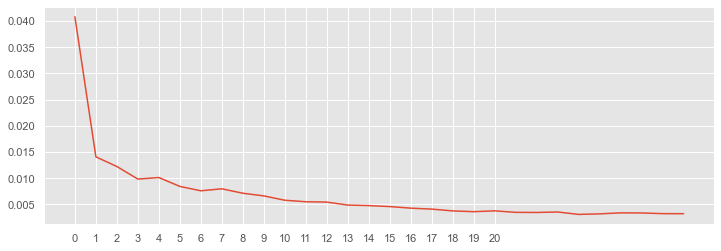

In [369]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

In [370]:
lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

1/1 [==============================] - 0s 33ms/step


In [371]:
lstm_predictions_scaled

[array([0.29044405], dtype=float32),
 array([0.28851986], dtype=float32),
 array([0.2856387], dtype=float32),
 array([0.2832492], dtype=float32),
 array([0.28195804], dtype=float32),
 array([0.28195715], dtype=float32),
 array([0.28223214], dtype=float32),
 array([0.28239596], dtype=float32),
 array([0.28234813], dtype=float32),
 array([0.28171822], dtype=float32),
 array([0.28047028], dtype=float32),
 array([0.27822918], dtype=float32),
 array([0.27630293], dtype=float32),
 array([0.27430403], dtype=float32),
 array([0.2722841], dtype=float32),
 array([0.27021858], dtype=float32),
 array([0.26808858], dtype=float32),
 array([0.265882], dtype=float32),
 array([0.26360065], dtype=float32),
 array([0.26125306], dtype=float32),
 array([0.25884944], dtype=float32),
 array([0.25640368], dtype=float32),
 array([0.25392163], dtype=float32),
 array([0.25141042], dtype=float32),
 array([0.24886604], dtype=float32),
 array([0.24628973], dtype=float32),
 array([0.24368171], dtype=float32),
 array

In [372]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)

In [373]:
lstm_predictions

array([[1581.72845235],
       [1580.42433465],
       [1578.47162214],
       [1576.85214489],
       [1575.97706403],
       [1575.97645808],
       [1576.16282986],
       [1576.27386114],
       [1576.24144251],
       [1575.81452651],
       [1574.96873352],
       [1573.44982471],
       [1572.14431331],
       [1570.78955791],
       [1569.42054235],
       [1568.02064325],
       [1566.57703454],
       [1565.08151562],
       [1563.53533881],
       [1561.94426068],
       [1560.31520932],
       [1558.65759725],
       [1556.97538338],
       [1555.27341535],
       [1553.54895626],
       [1551.80286456],
       [1550.03528162],
       [1548.24728808],
       [1546.43992415],
       [1544.61407857],
       [1542.77058959],
       [1540.91030553],
       [1539.03386265],
       [1537.14163462],
       [1535.23441929],
       [1533.3129135 ]])

In [374]:
test_data['LSTM_Predictions'] = lstm_predictions

In [375]:
test_data

,y,LSTM_Predictions
Date,,
2022-09-12,1620.67,1581.728452
2022-09-13,1598.49,1580.424335
2022-09-14,1531.75,1578.471622
2022-09-15,1481.05,1576.852145
2022-09-16,1457.23,1575.977064
2022-09-19,1495.49,1575.976458
2022-09-20,1490.95,1576.162830
2022-09-21,1475.71,1576.273861
2022-09-22,1463.64,1576.241443


In [376]:
ai=test_data[["y","LSTM_Predictions"]]
fig = px.line(ai, x=test_data.index, y=ai.columns,title="Predicción con Modelo LSTM")
fig.show()

In [377]:
evaluacion_metrica(test_data["y"],test_data["LSTM_Predictions"])

Evaluation metric results:-
MSE is : 8284.009875095957
MAE is : 74.97880675167677
RMSE is : 91.01653627278922
MAPE is : 5.129119466320279
R2 is : -1.2949962318910808

